<b>¿Qué aspectos (precisión, higiene, check-in o comunicación) presentan las mayores diferencias entre los alojamientos mejor y peor valorados en la evaluación general?</b>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
pd.set_option('display.max_columns',  40)

In [11]:
df = pd.read_csv('tourist_accommodation_03112025_clean.csv')
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,is_valid,ocupacion_mes
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,True,7,20,40,130,78,2010-02-01,2017-05-09,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.406532,Spain,Málaga,2018-07-31,True,23
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,Cármenes,Latina,Private room,1,1,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,True,0,0,0,162,33,2014-10-10,2018-07-15,92.0,9.0,9.0,10.0,10.0,8.0,9.0,0,0.244807,Spain,Madrid,2020-10-01,True,30
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2.0,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,True,26,31,31,270,148,2011-05-01,2019-07-22,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.837420,Spain,Sevilla,2019-07-29,True,4
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,L'Antiga Esquerra De L'Eixample,Eixample,Private room,2,2,1.0,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,True,9,23,49,300,292,2012-03-13,2020-04-01,94.0,10.0,9.0,10.0,10.0,10.0,9.0,1,1.757272,Spain,Barcelona,2020-10-01,True,21
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1,2.0,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,True,0,19,49,312,36,2011-08-07,2018-08-08,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.207533,Spain,Girona,2019-02-19,True,30


In [12]:
# Seleccionar solo las columnas deseadas

cols_review = [
    'room_type',
    'city',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

# Filtrar apartamentos con nota 100

df_reviews = df.loc[df['review_scores_rating'] == 100, cols_review]

df_reviews

,room_type,city,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
73,Private room,Barcelona,100.0,10.0,10.0,6.0,10.0,8.0,8.0
109,Private room,Barcelona,100.0,8.0,8.0,10.0,10.0,10.0,8.0
126,Private room,Barcelona,100.0,10.0,10.0,10.0,10.0,10.0,10.0
149,Entire home/apt,Mallorca,100.0,10.0,10.0,10.0,10.0,10.0,10.0
163,Entire home/apt,Madrid,100.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...
7517,Entire home/apt,Mallorca,100.0,10.0,10.0,10.0,10.0,10.0,10.0
7519,Private room,Barcelona,100.0,10.0,10.0,10.0,10.0,10.0,10.0
7524,Private room,Barcelona,100.0,10.0,6.0,10.0,10.0,10.0,10.0
7528,Private room,Mallorca,100.0,10.0,10.0,9.0,9.0,10.0,10.0


In [13]:
# Definir categories de review
cols_review = [
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication'
]

# Crear subconjunts
top = df[df['review_scores_rating'] >= 90]
bottom = df[df['review_scores_rating'] <= 70]

# Calcular mitjanes per grup
mean_top = top[cols_review].mean()
mean_bottom = bottom[cols_review].mean()

# Calcular diferències
diff = (mean_top - mean_bottom).sort_values(ascending=False)

# Resultat en una taula
summary = pd.DataFrame({
    'Top rated (≥9)': mean_top.round(2),
    'Low rated (≤7)': mean_bottom.round(2),
    'Diferència': diff.round(2)
})

summary


,Top rated (≥9),Low rated (≤7),Diferència
review_scores_accuracy,9.76,0.69,9.07
review_scores_checkin,9.84,0.80,9.04
review_scores_cleanliness,9.62,0.70,8.92
review_scores_communication,9.85,0.79,9.07


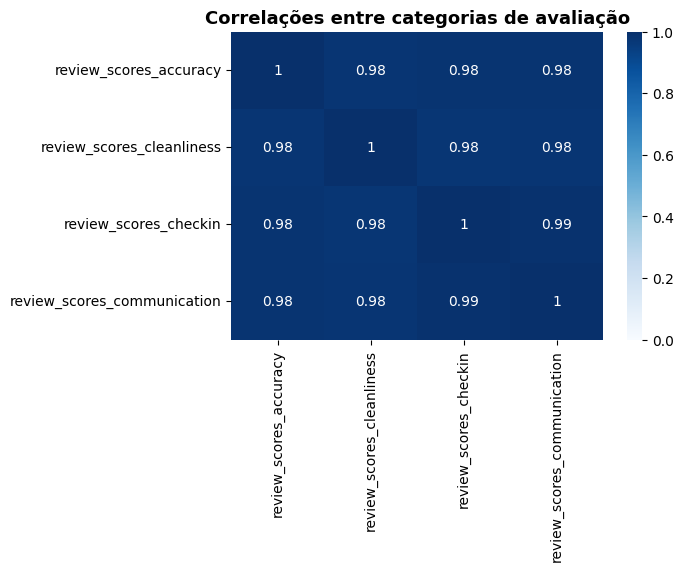

In [14]:
corr_matrix = df[cols_review].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Correlações entre categorias de avaliação', fontsize=13, fontweight='bold')
plt.show()


CREACIÓN COLUMNA GRUPO VALORACIÓN

In [17]:
cats = [
    'review_scores_accuracy',       
    'review_scores_cleanliness',    
    'review_scores_checkin',        
    'review_scores_communication'       
]

# --- Definición de Parámetros y Categorías ---
col_rating_general = 'review_scores_rating'

df[cats + [col_rating_general]] = df[cats + [col_rating_general]].apply(pd.to_numeric, errors='coerce')

# Eliminamos filas donde el rating general es NaN, ya que no podemos agruparlas
df = df.dropna(subset=[col_rating_general])

# --- Creación de los Grupos de Valoración (BINS) ---
bins = [0, 3, 5, 7, 9, 10]
labels = [
    "Insuficiente Bajo (0-3)",
    "Insuficiente Alto (3-5)",
    "Suficientes (5-7)",
    "Notables (7-9)",
    "Excelentes (9-10)"
]

rating_adaptado = df[col_rating_general]/10


df['grupo_valoracion'] = pd.cut(
    rating_adaptado,
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

In [ ]:
# --- Definición de Comparaciones ---
comparaciones = [
    ("Excelentes (9-10)", "Notables (7-9)"),
    ("Notables (7-9)", "Suficientes (5-7)"),
    ("Suficientes (5-7)", "Insuficiente Alto (3-5)"),
    ("Insuficiente Alto (3-5)", "Insuficiente Bajo (0-3)")
]

# --- Agrupamos los datos por grupo de valoración ---
groups_data = {name: g for name, g in df.groupby('grupo_valoracion')}

rows = []  # Lista para resultados

# --- Iteramos sobre las comparaciones ---
for (top_label, bottom_label) in comparaciones:
    
    top_g = groups_data.get(top_label)
    bottom_g = groups_data.get(bottom_label)
    
    if top_g is None or bottom_g is None:
        print(f"Saltando comparación '{top_label}' vs '{bottom_label}' (faltan datos).")
        continue

    # Calculamos medias y Welch t-test por cada categoría
    for col in cats:
        top_vals = top_g[col].dropna()
        bottom_vals = bottom_g[col].dropna()

        # Si alguno no tiene datos, saltamos
        if top_vals.empty or bottom_vals.empty:
            continue

        # Medias
        mean_top = top_vals.mean()
        mean_bottom = bottom_vals.mean()
        diff = mean_top - mean_bottom

        # Test de Welch
        t_stat, p_val = ttest_ind(top_vals, bottom_vals, equal_var=False, nan_policy='omit')

        # Guardamos resultados
        rows.append({
            'comparacion': f"{top_label} vs {bottom_label}",
            'category': col.replace('review_scores_', '').capitalize(),
            'mean_top': round(mean_top, 2),
            'mean_bottom': round(mean_bottom, 2),
            'diff': round(diff, 2),
            'p_value': round(p_val, 4)
        })

# --- DataFrame final ---
group_category_diff = (
    pd.DataFrame(rows)
      .sort_values(['comparacion', 'diff'], ascending=[True, False])
      .reset_index(drop=True)
)

# --- Factor con mayor diferencia por salto de grupo ---
tmp = group_category_diff.dropna(subset=['diff'])
max_gap_per_comparison = tmp.loc[
    tmp.groupby('comparacion')['diff'].idxmax(),
    ['comparacion', 'category', 'diff', 'p_value']
].reset_index(drop=True)

print("\n--- Factor con Mayor Diferencia por Salto de Grupo ---")
print(max_gap_per_comparison)

print(group_category_diff.head())

# group_category_diff.to_csv("saltos_calidad.csv", index=False, encoding='utf-8')



--- Factor con Mayor Diferencia por Salto de Grupo ---
                                         comparacion     category  diff  \
0                Excelentes (9-10) vs Notables (7-9)  Cleanliness  0.93   
1  Insuficiente Alto (3-5) vs Insuficiente Bajo (...      Checkin  6.08   
2                Notables (7-9) vs Suficientes (5-7)     Accuracy  1.59   
3       Suficientes (5-7) vs Insuficiente Alto (3-5)     Accuracy  2.56   

   p_value  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
                                         comparacion       category  mean_top  \
0                Excelentes (9-10) vs Notables (7-9)    Cleanliness      9.66   
1                Excelentes (9-10) vs Notables (7-9)       Accuracy      9.80   
2                Excelentes (9-10) vs Notables (7-9)  Communication      9.88   
3                Excelentes (9-10) vs Notables (7-9)        Checkin      9.86   
4  Insuficiente Alto (3-5) vs Insuficiente Bajo (...        Checkin      6.14   

   mean_bottom  

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21996\1340074325.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_data = {name: g for name, g in df.groupby('grupo_valoracion')}


In [20]:
tabla_medias = df.groupby('grupo_valoracion', observed=False)[cats].mean().round(2)

tabla_medias.T

grupo_valoracion,Insuficiente Bajo (0-3),Insuficiente Alto (3-5),Suficientes (5-7),Notables (7-9),Excelentes (9-10)
review_scores_accuracy,0.03,4.77,7.33,8.92,9.80
review_scores_cleanliness,0.04,5.14,7.34,8.74,9.66
review_scores_checkin,0.06,6.14,8.13,9.26,9.86
review_scores_communication,0.06,5.68,8.12,9.26,9.88


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21996\2415110943.py:5: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  barplot = sns.barplot(


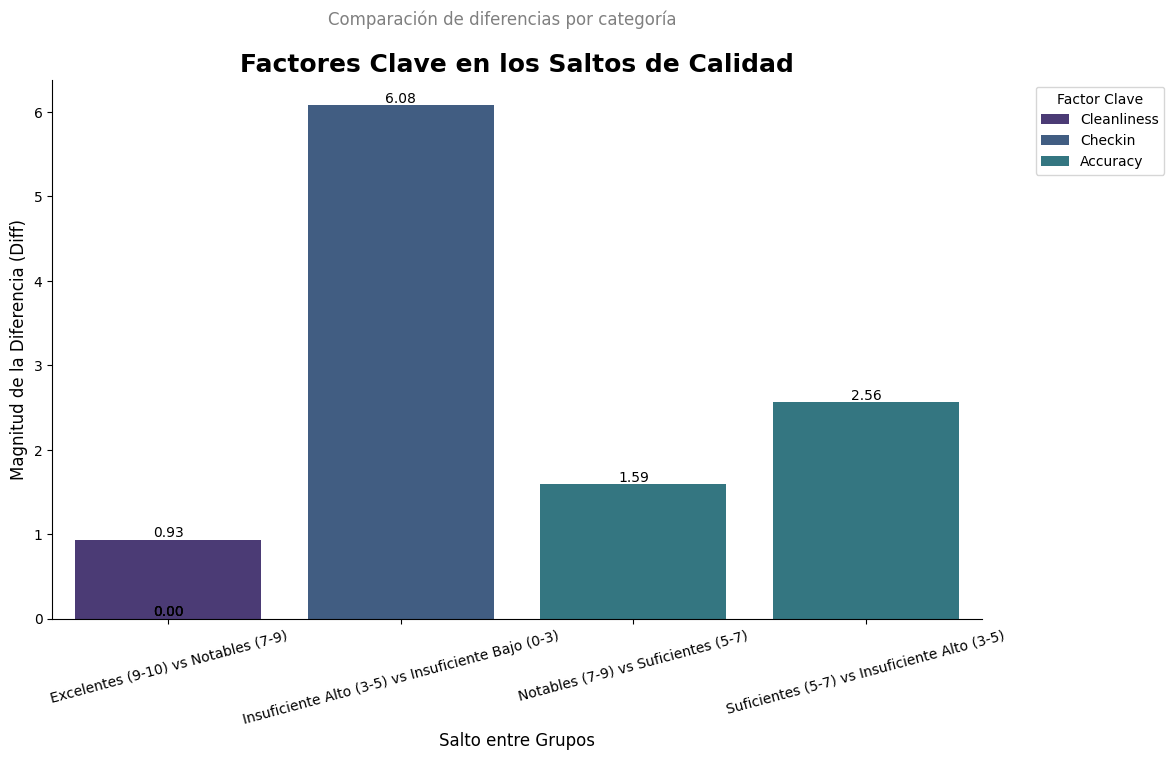

In [21]:
plt.figure(figsize=(12, 7))

palette = sns.color_palette("viridis")

barplot = sns.barplot(
    data=max_gap_per_comparison,
    x='comparacion',
    y='diff',
    hue='category',
    palette=palette
)

# Títulos y etiquetas
plt.title("Factores Clave en los Saltos de Calidad", fontsize=18, weight='bold')
plt.suptitle("Comparación de diferencias por categoría", fontsize=12, color='gray')
plt.xlabel("Salto entre Grupos", fontsize=12)
plt.ylabel("Magnitud de la Diferencia (Diff)", fontsize=12)
plt.xticks(rotation=15)

# Leyenda fuera del gráfico
plt.legend(title='Factor Clave', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar valores encima de las barras
for p in barplot.patches:
    barplot.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

sns.despine()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21996\1994151335.py:5: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  barplot_grouped = sns.barplot(


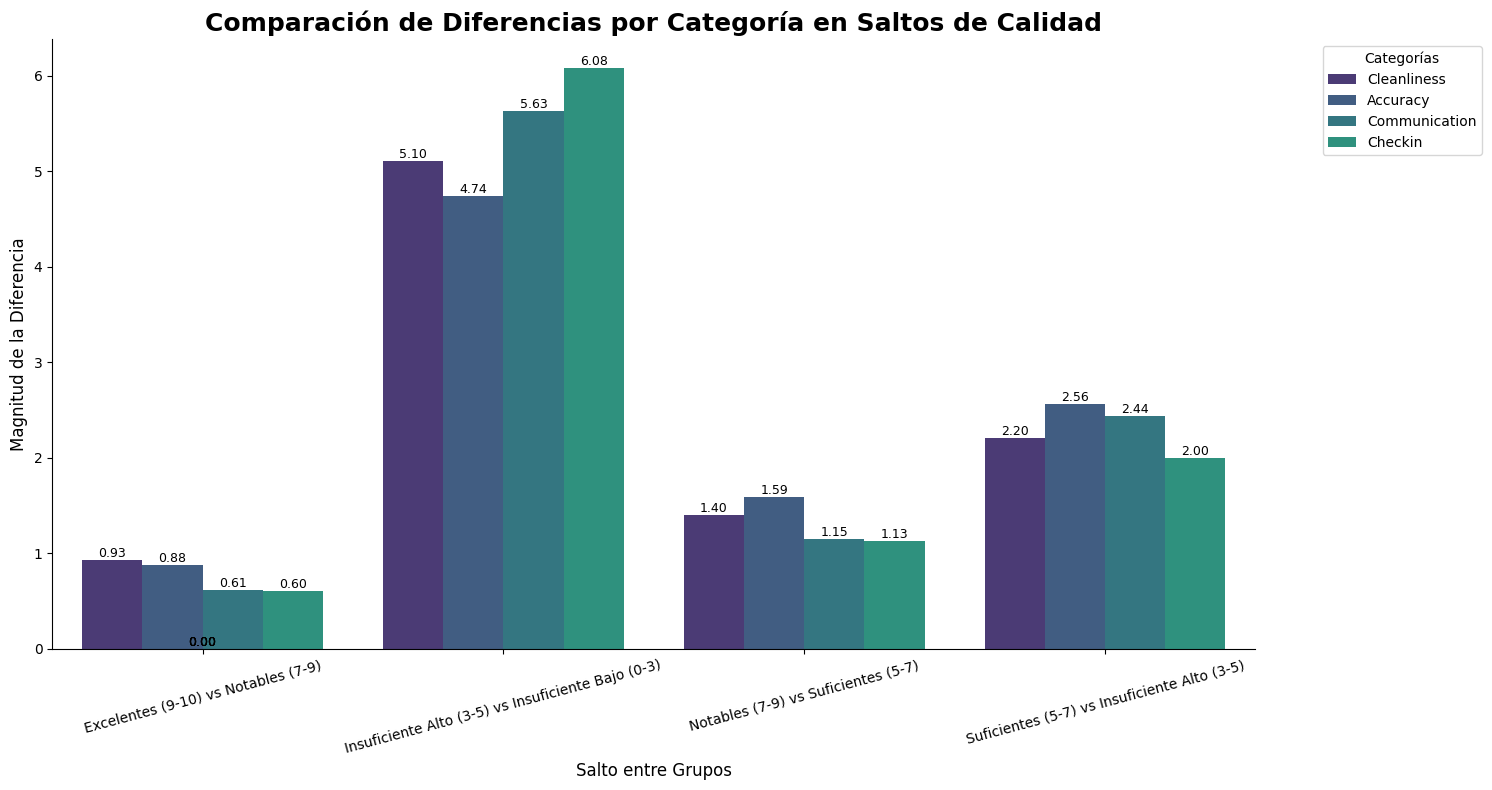

In [22]:
plt.figure(figsize=(15, 8))

palette = sns.color_palette("viridis")

barplot_grouped = sns.barplot(
    data=group_category_diff,
    x='comparacion',
    y='diff',
    hue='category',
    palette=palette
)

# Títulos y etiquetas
plt.title("Comparación de Diferencias por Categoría en Saltos de Calidad", fontsize=18, weight='bold')
plt.xlabel("Salto entre Grupos", fontsize=12)
plt.ylabel("Magnitud de la Diferencia", fontsize=12)
plt.xticks(rotation=15)

# Leyenda fuera del gráfico
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar valores encima de las barras
for p in barplot_grouped.patches:
    barplot_grouped.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=9, color='black'
    )

sns.despine()
plt.tight_layout()
plt.show()

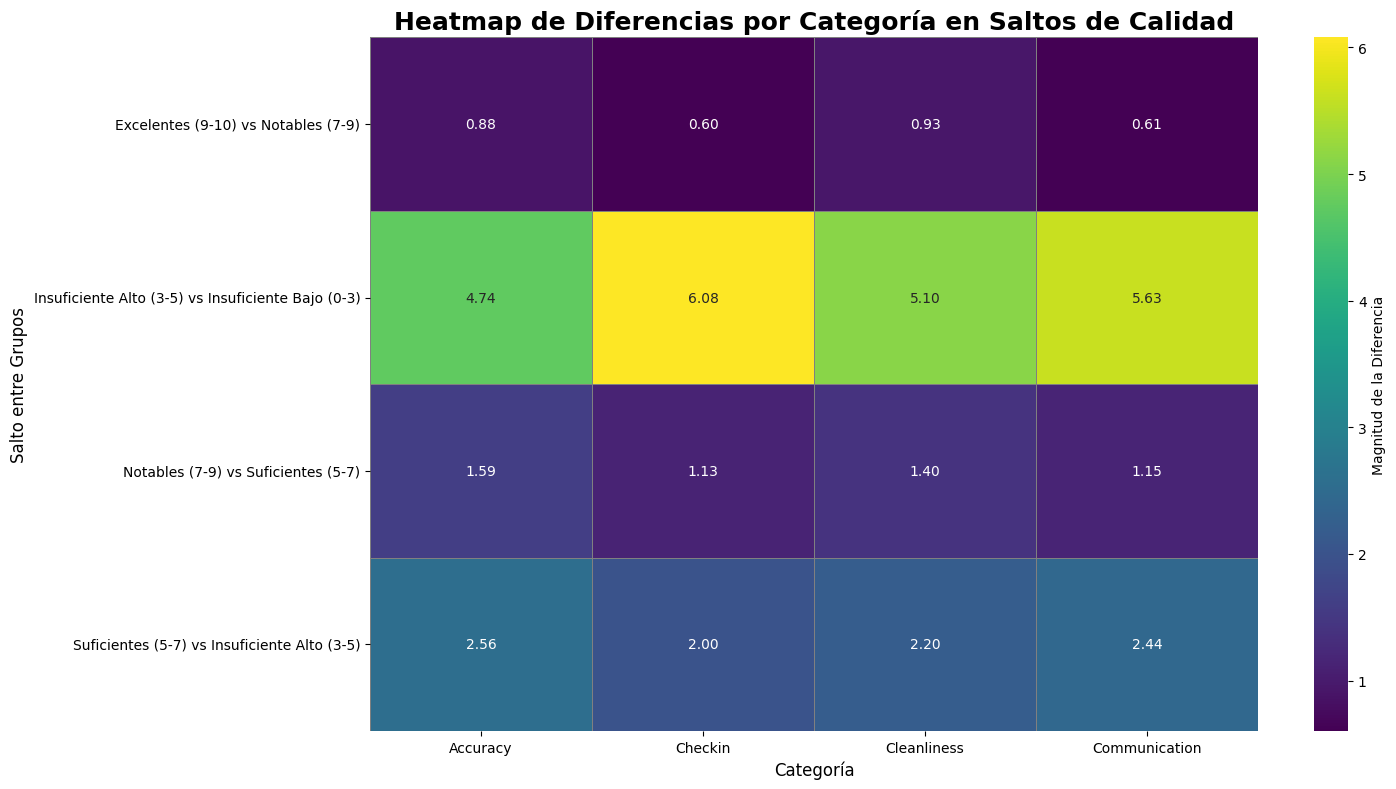

In [23]:
# Pivotamos la tabla: filas = comparaciones, columnas = categorías, valores = diff
pivot_table = group_category_diff.pivot(
    index='comparacion',
    columns='category',
    values='diff'
)

plt.figure(figsize=(15, 8))


sns.heatmap(
    pivot_table,
    annot=True,        # Muestra los valores dentro de cada celda
    fmt=".2f",         # Formato de los números
    cmap="viridis",      # Paleta de colores
    linewidths=0.5,    # Líneas divisorias
    linecolor='gray',  # Color de las líneas
    cbar_kws={'label': 'Magnitud de la Diferencia'}  # Etiqueta de la barra de color
)

# Títulos y etiquetas
plt.title("Heatmap de Diferencias por Categoría en Saltos de Calidad", fontsize=18, weight='bold')
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Salto entre Grupos", fontsize=12)

plt.tight_layout()
plt.show()

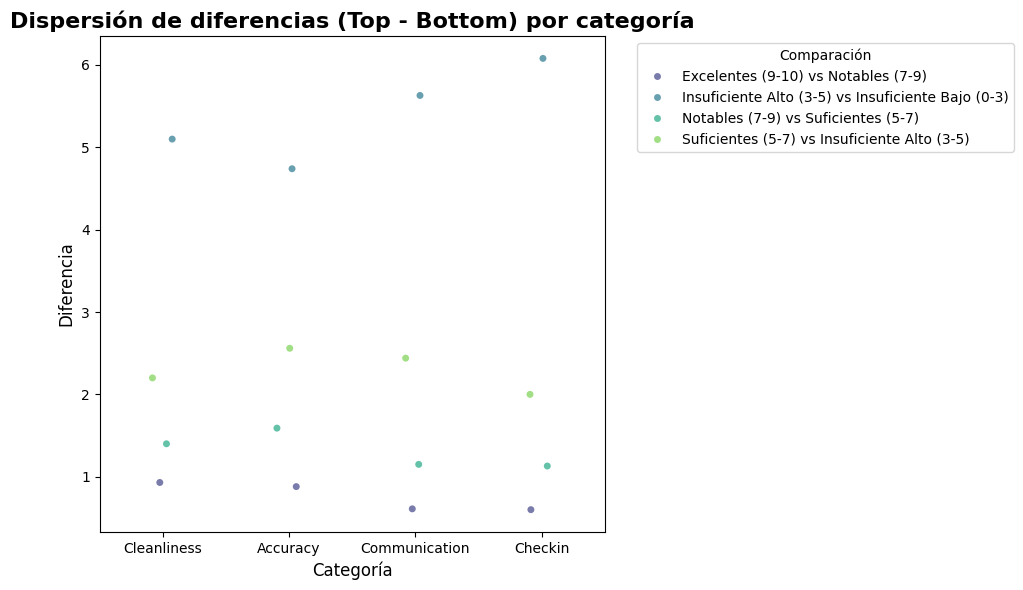

In [24]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=group_category_diff,
    x='category',
    y='diff',
    hue='comparacion',
    jitter=True,
    alpha=0.7,
    palette='viridis'
)
plt.title("Dispersión de diferencias (Top - Bottom) por categoría", fontsize=16, weight='bold')
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Diferencia", fontsize=12)
plt.legend(title='Comparación', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
